# Chapter 6 -  Data Sourcing via Web
## Segment 3 - Data parsing

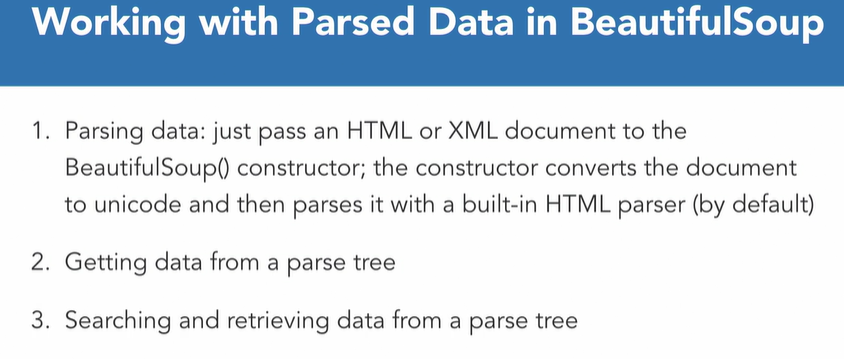

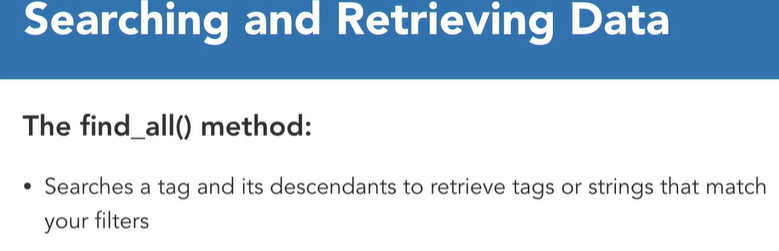

In [2]:
from bs4 import BeautifulSoup

import urllib
import urllib.request
import re


In [4]:
with urllib.request.urlopen('https://raw.githubusercontent.com/BigDataGal/Data-Mania-Demos/master/IoT-2018.html') as response:
    html = response.read()

In [5]:
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

### Parsing your data

In [6]:
print(soup.prettify()[0:300])

<html>
 <head>
  <title>
   IoT Articles
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
   </b>
  </p>
  <p class="description">
   It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article,


### Getting data from a parse tree

In [7]:
text_only = soup.get_text()
print(text_only)

IoT Articles

2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...


It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
Looking Back at My Coolest IoT Find in 2017
Before going into detail about best new IoT device ideas, here’s the backstory. Last month Ericsson Digital invited me to tour the Ericsson Studio in Kista, Sweden. Up until that visit, IoT had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.

It wasn’t until I got to the Ericsson Stu

### Searching and retrieving data from a parse tree

#### Retrieving tags by filtering with name arguments

In [8]:
soup.find_all("li")

[<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>,
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>,
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>,
 <li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity<

##### Retrieving tags by filtering with keyword arguments

In [9]:
soup.find_all(id="link 7")

[<a class="preview" href="http://www.skyfilabs.com/iot-online-courses" id="link 7">SkyFi</a>]

##### Retrieving tags by filtering with string arguments

In [10]:
soup.find_all('ol')

[<ol>
 <li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
 </ol>,
 <ol>
 <li>Enable built-in sensing to build a weather station that measures ambient temperat

##### Retrieving tags by filtering with list objects

In [11]:
soup.find_all(['ol', 'b'])

[<b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b>,
 <ol>
 <li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
 </ol>,
 <ol>
 <li

##### Retrieving tags by filtering with regular expressions

In [14]:
t = re.compile("t")
for tag in soup.find_all(t):
    print(tag.string)

None
IoT Articles
Last month Ericsson Digital invited me
watch the videos on this page
Big Data
Machine Learning
Blockchain
watch these videos


##### Retrieving tags by filtering with a Boolean value

In [16]:
for tag in soup.find_all(False):
    print(tag.string)

None
IoT Articles
IoT Articles
None
2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
None
None
None
Looking Back at My Coolest IoT Find in 2017
Last month Ericsson Digital invited me
Last month Ericsson Digital invited me
Last month Ericsson Digital invited me
IoT
None
None
Mat.se
watch the videos on this page
watch the videos on this page
watch the videos on this page
Future Trends for IoT in 2018
None
None
Big Data
None
Machine Learning
None
Blockchain
Best New IoT Device Ideas
IoT courses on Udemy
SkyFi
Coursera
Raspberry Pi IoT Ideas
None
Enable built-in sensing to build a weather station that measures ambient temperature and humidity
Build a system that detects discrepancies in electrical readings to identify electricity theft
Use IoT to build a Servo that is controlled by motion detection readings
Build a smart control switch that operates devices based on external stimuli. Use this f

##### Retrieving weblinks by filtering with string objects

In [19]:
for link in soup.find_all("a"):
    print(link.get('href'))

http://bit.ly/LPlNDJj
http://www.data-mania.com/blog/m2m-vs-iot/
bit.ly/LPlNDJj
http://mat.se/
http://bit.ly/LPlNDJj
https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&mid=39197&murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated
http://www.skyfilabs.com/iot-online-courses
https://www.coursera.org/specializations/iot
bit.ly/LPlNDJj
http://bit.ly/LPlNDJj


##### Retrieving strings by filtering with regular expressions

In [20]:
soup.find_all(string=re.compile("data"))

[' & Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.']